Im showing different techniques in this notebook to test if our data can be approximated to a normal distribution

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from scipy.stats import shapiro, anderson
from itertools import cycle, product
from math import ceil, floor
import seaborn as sns

In [22]:
cmap = get_cmap('cool')
colors = cycle(cmap(np.random.permutation(np.linspace(0, 1, 10))))

We want to test if our samples (X) are normally distributed <br/>
$H_0 : X \approx N(\mu, \sigma)$ <br/>
$H_1 : X \not\approx N(\mu, \sigma)$

Im going to generate different samples: $X_1, X_2, ..., X_m$ of size n <br/>
The lower is the index of the sample, the normality of the sample will be higher

In [138]:
m = 8
n = 5000
samples = []
for i in range(0, m):
    k = i / m
    X = np.random.randn(n) + (np.random.rand(n) * 2 - 1) * 5 * k
    samples.append(X)


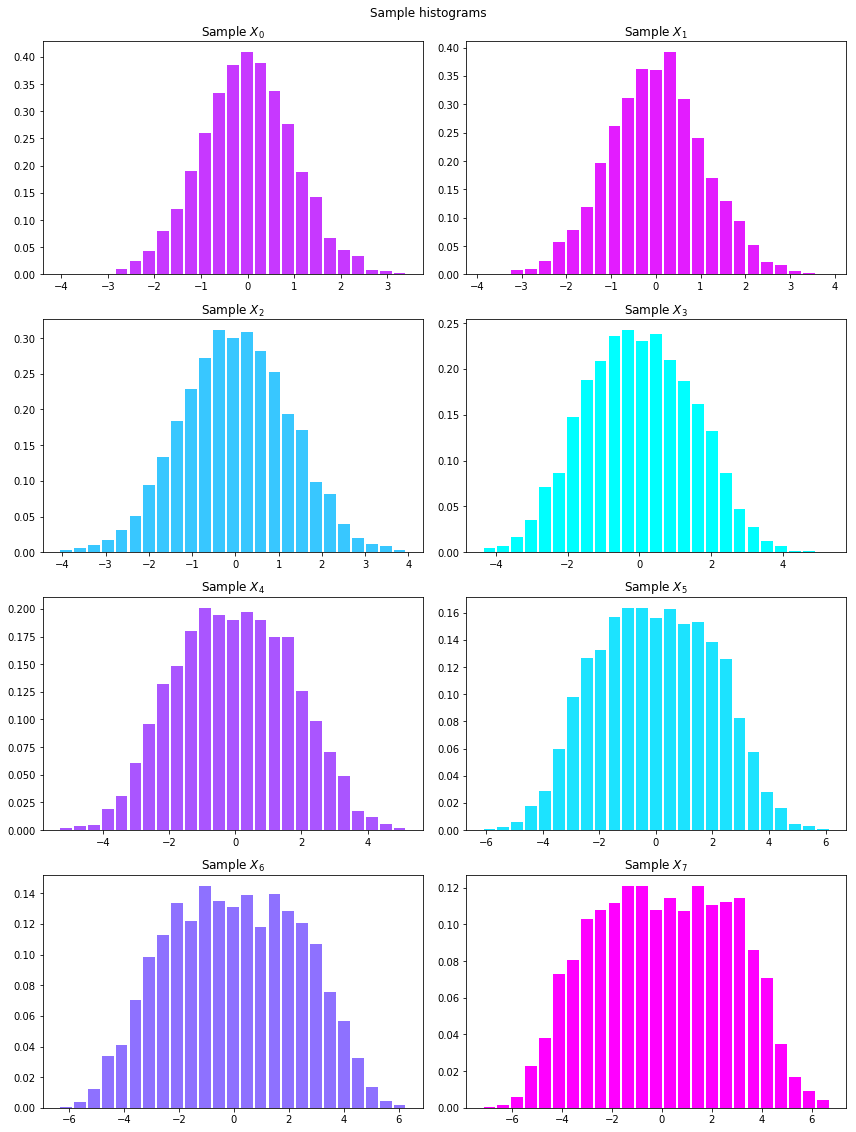

In [139]:
cols = 2
rows = ceil(m / cols)

fig, ax = plt.subplots(rows, cols, figsize=(cols*6, rows*4))

for i, j in product(range(0, rows), range(0, cols)):
    k = i * cols + j
    if k < m:
        plt.sca(ax[i, j])
        plt.hist(samples[k], bins=25, rwidth=0.85, density=True, color=next(colors));
        plt.title('Sample $X_{}$'.format(k))
    else:
        ax[i, j].set_visible(False)

plt.suptitle('Sample histograms')
plt.tight_layout()
plt.subplots_adjust(top=0.95)

Now test each sample normality using Shapiro–Wilk test using shapiro() method on scipy.stats <br/>

In [140]:
df = pd.DataFrame(
    [shapiro(X) for X in samples]).rename(columns={0:'z-value', 1:'p-value'})
df['z-value'] =  df['z-value'].round(6)
df['p-value'] = df['p-value'].round(6)
df

,z-value,p-value
0,0.999770,0.892436
1,0.999591,0.392713
2,0.999482,0.187397
3,0.996749,0.000000
4,0.994896,0.000000
5,0.991324,0.000000
6,0.986419,0.000000
7,0.982352,0.000000


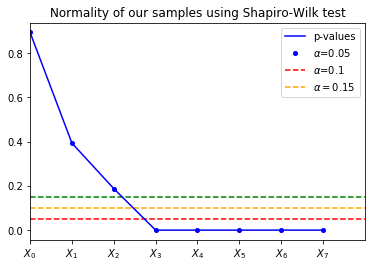

In [165]:
plt.plot(df['p-value'], color='blue')
plt.plot(df['p-value'], 'b.', markersize=8)
plt.hlines([0.05], xmin=0, xmax=m, color='red', linestyles='--')
plt.hlines([0.1], xmin=0, xmax=m, color='orange', linestyles='--')
plt.hlines([0.15], xmin=0, xmax=m, color='green', linestyles='--')

plt.xticks(np.arange(0, m), labels=['$X_{}$'.format(i) for i in range(0, m)])
plt.xlim([0, m])

plt.title('Normality of our samples using Shapiro-Wilk test');
plt.legend(['p-values', '$\\alpha$=0.05', '$\\alpha$=0.1', '$\\alpha=0.15$']);

We can also use the anderson-darling test to check the normality of our samples. <br/>
For this one, we will have a different critical value for each value of the level of significance ($\alpha$) <br/>
The result of the test is an statistic value called $A^2$ <br/>
Null hypothesis will be accepted if $A^2$ is lower than the critical value

In the next cell i will calculate the difference between the critical value associated to each $\alpha$ and $A^2$ (for each sample $X_i$). If its lower than 0 (critical value < $A^2$) the value is set to 0

I use scipy.stats.anderson() to make the test

In [208]:
alphas = np.array([0.15, 0.10, 0.05, 0.025, 0.01])
results = np.array(
    [result.critical_values - result.statistic for result in [anderson(X) for X in samples]])
df = pd.DataFrame(results).rename(columns=dict(zip(range(0, len(alphas)), alphas)))
df.clip(0, inplace=True)
df

,0.15,0.1,0.05,0.025,0.01
0,0.434015,0.513015,0.644015,0.775015,0.949015
1,0.000000,0.015174,0.146174,0.277174,0.451174
2,0.082957,0.161957,0.292957,0.423957,0.597957
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000


The next graphic helps to visualize anderson's test results. The darker the cell, more close will be $A^2$ to the critical value.

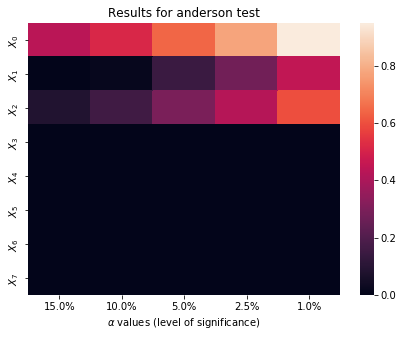

In [223]:
plt.figure(figsize=(7, 5))
sns.heatmap(df,
            yticklabels=['$X_{}$'.format(i) for i in range(0, m)],
            xticklabels=['{}%'.format(x) for x in alphas*100])
plt.xlabel('$\\alpha$ values (level of significance)');
plt.title('Results for anderson test');